<a href="https://colab.research.google.com/github/jhj030722/Kaggle_study_2024_1/blob/main/8%EC%A3%BC%EC%B0%A8_hitters_baseball_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 변수 설명

AtBat: 1986년에 선수가 타석에 서서 타격을 시도한 횟수입니다.

Hits: 1986년에 선수가 친 안타의 수입니다.

HmRun: 1986년에 선수가 친 홈런의 수입니다.

Runs: 1986년에 선수가 득점한 횟수입니다.

RBI: 1986년에 선수가 타점을 올린 횟수입니다.

Walks: 1986년에 선수가 공을 받은 횟수입니다.

Years: 선수가 메이저 리그에서 활동한 연수입니다.

CAtBat: 선수가 경력 동안 타석에 서서 타격을 시도한 총 횟수입니다.

CHits: 선수가 경력 동안 친 안타의 총 수입니다.

CHmRun: 선수가 경력 동안 친 홈런의 총 수입니다.

CRuns: 선수가 경력 동안 득점한 총 횟수입니다.

CRBI: 선수가 경력 동안 타점을 올린 총 횟수입니다.

CWalks: 선수가 경력 동안 공을 받은 총 횟수입니다.

League: 1986년 말 기준으로 선수가 속한 리그를 나타내는 변수입니다. A는 American League, N은 National League을 나타냅니다.

Division: 1986년 말 기준으로 선수가 속한 구역을 나타내는 변수입니다. E는 East, W는 West를 나타냅니다.

PutOuts: 1986년에 선수가 수비로 적극적으로 참여하여 상대 팀을 아웃으로 만든 횟수입니다.

Assists: 1986년에 선수가 수비 도중 도움을 준 횟수입니다.

Errors: 1986년에 선수가 수비 도중 실수를 저지른 횟수입니다.

Salary: 1987년의 개막일에 선수가 받은 연봉(단위: 천 달러)입니다.

NewLeague: 1987년 초 기준으로 선수가 속한 리그를 나타내는 변수입니다. A는 American League, N은 National League을 나타냅니다.

In [ ]:
pip install lucifer-ml

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import pandas as pd
import seaborn as sns
import plotly.express as px

# importing luficerML
from luciferml.supervised.regression import Regression

import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DART-B/캐글 스터디/Hitters.csv')

In [ ]:
dataset.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
# 열과 행 개수 세기
dataset.shape

(322, 20)

In [ ]:
# 결측치 확인
dataset.isnull().sum()

#salary에 59개 결측치 확인

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
# 결측치 드랍하기
dataset = dataset.dropna()

AttributeError: 'function' object has no attribute 'sum'

In [ ]:
dataset.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [ ]:
# 기본 summary 확인
dataset.describe().T.style.bar(
    subset=['mean'], color='#606ff2').background_gradient(
        subset=['std'], cmap='PuBu').background_gradient(subset=['std'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
AtBat,263.000000,403.642586,147.307209,19.000000,282.500000,413.000000,526.000000,687.000000
Hits,263.000000,107.828897,45.125326,1.000000,71.500000,103.000000,141.500000,238.000000
HmRun,263.000000,11.619772,8.757108,0.000000,5.000000,9.000000,18.000000,40.000000
Runs,263.000000,54.745247,25.539816,0.000000,33.500000,52.000000,73.000000,130.000000
RBI,263.000000,51.486692,25.882714,0.000000,30.000000,47.000000,71.000000,121.000000
Walks,263.000000,41.114068,21.718056,0.000000,23.000000,37.000000,57.000000,105.000000
Years,263.000000,7.311787,4.793616,1.000000,4.000000,6.000000,10.000000,24.000000
CAtBat,263.000000,2657.543726,2286.582929,19.000000,842.500000,1931.000000,3890.500000,14053.000000
CHits,263.000000,722.186312,648.199644,4.000000,212.000000,516.000000,1054.000000,4256.000000
CHmRun,263.000000,69.239544,82.197581,0.000000,15.000000,40.000000,92.500000,548.000000


# 시각화

In [ ]:
## Bar plots

fig = px.bar(dataset, y='NewLeague', color='Salary', template = 'plotly_dark')
fig.show()

# 뉴리그의 인자인 A와 연봉이 위쪽, 뉴리그 인자인 N과 연봉이 아래
# Above plots shows the distribution of New Leagues among Different Salaries

In [ ]:
fig = px.histogram(dataset, y='League', x='Salary', color='Runs', hover_data=dataset.columns, template = 'plotly_dark',
                   title = 'Salary with League in relation with Runs')
fig.show()


#Above plots shows the Current Leagues with Salary represented by Runs

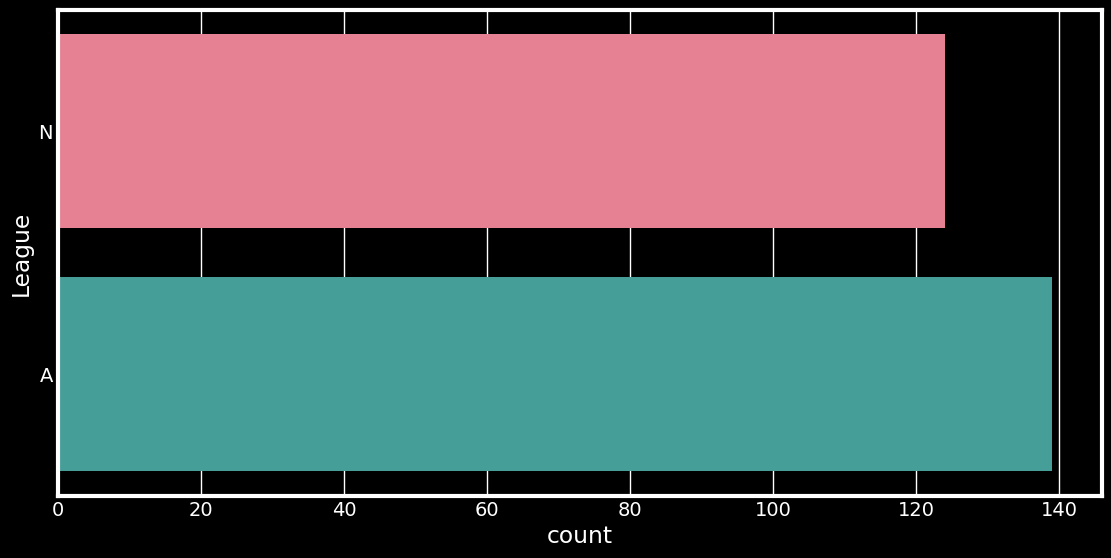

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='League', data=dataset, palette='husl');

#A리그와 N리그의 개수를 셈 : 리그 A는 140개 정도 리그 N은 125개 정도

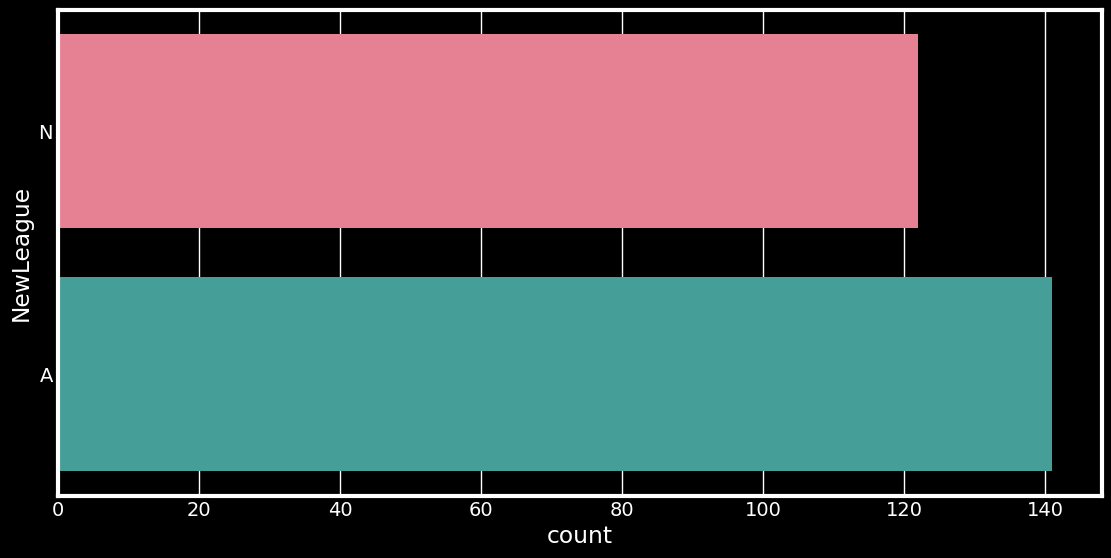

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='NewLeague', data=dataset, palette='husl');

#Newleague의 개수 세는거: 크게 달라진것같진 않음

## Bubbled Scatter

In [ ]:
fig = px.scatter(dataset, x='Hits', y='CAtBat', size='Salary', color='Runs', log_x=True, size_max=60, template='plotly_dark',
                 title = 'Hits vs CAtBat')
fig.show()

Above plot shows the Hits for different CAtBat intensified by their respective Runs and their size is the representation of their Salary

Runs에 의해 강화된 CatBat에 대한 hits(안타)를 보여줌
버블 크기 = 급여

## Heatmap

In [ ]:
fig = px.density_heatmap(dataset, x='Salary', y='Years', title='Salary vs Years of Experience', template='plotly_dark')
fig.show()

위의 히트맵은 선수들의 경력(year)에 대한 연봉의 intensity를 보여준다.
급여는 선수 경력에 비례하며, 경력이 적은 선수들이 많다는 결론을 내릴 수 있다.

In [ ]:
fig = px.density_heatmap(dataset, x='Salary', y='Runs', title='Salary vs Runs', template='plotly_dark')
fig.show()

Runs에 대한 급여의 intensity가 표시됨.
선수의 급여는 그들의 득점에 선형적으로 비례한다고 결론 가

## Ternary Scatter

In [ ]:
fig = px.scatter_ternary(dataset, a='Salary', b='Assists', c='Errors', hover_name='Division',
                         color='Runs', template='plotly_dark', size='Hits', size_max=30,)
fig.show()

선수의 연봉, 어시스트, 에러의 비율을 보여주는 scatter

## 3-D Scatter

In [ ]:
fig = px.scatter_3d(dataset, x='Runs', y='Salary', z='Years', color='CRuns',
                    template='plotly_dark',
                    title='Distribution of Runs and salary of player with career Runs')
fig.show()

## Box plot

In [ ]:
fig = px.box(dataset, x='Salary', y='League', template='plotly_dark', title='Salary with League')
fig.show()

리그 A의 선수들은 최고 연봉이 높고 N리그의 선수들은 최고 연봉이 낮다
메디안은 N리그가 더 높다

## Pie plot

In [ ]:
fig = px.pie(dataset, names='NewLeague', values='Errors', template='plotly_dark',
             title='Representation of New League with Errors')
fig.show()

## correlation plot

In [ ]:
# 범주형 변수를 숫자형으로 변환
dataset['League'] = dataset['League'].map({'A': 0, 'N': 1})
dataset['NewLeague'] = dataset['NewLeague'].map({'A': 0, 'N': 1})
dataset['Division'] = dataset['Division'].map({'B': 0, 'W': 1})

fig = px.imshow(dataset.corr(), template='plotly_dark')
fig.show()

In [ ]:
dataset_excluded = dataset.drop(columns=['League', 'NewLeague', 'Division'])

fig = px.imshow(dataset_excluded.corr(), template='plotly_dark')
fig.show()


insight : AtBat는 Runs와 강한 상관관계가 있다

# 데이터 전처리

In [ ]:
dataset

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


- 데이터셋을 feature와 label로 분할
- feature: 독립변수
- label : 종속변수
- 종속변수로는 salary 선택
- 다음 단계에서 예측 진행

In [ ]:
dataset.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
features = dataset.drop('Salary', axis=1)
features
# SALARY 드롭하고 나머지 열들을 피쳐로 쓴다.

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,A


In [ ]:
labels = dataset.iloc[:,-2]
labels
#끝에서 두번째 열인 SALARY 가져오기

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

## let's train some models

In [ ]:
accuracy_scores = {}
RMSE = {}
regression = {}

## Linear Regression

In [ ]:
dataset = dataset.dropna()

In [ ]:
params_lin = {'fit_intercept':True, 'positive':True}
regressor = Regression(predictor = 'lin', params=params_lin, pca='y', pca_kernel='rbf',
                       n_components_pca = 3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Linear Regression on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation R2 Score is 4.42 %
        Validation Mean Absolute Error is : 313.86388090119783
        Validation Root Mean Squared Error is : 415.79069843327665
        R2 Score: -3.96 %
        Standard Deviation: 12.17 % 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ ]

Tim

## Support Vector Regressor

In [ ]:
params_svr = {'C':10000.0, 'gamma':0.8, 'kernel':'rbf'}
regressor = Regression(predictor = 'svr', params=params_svr, pca='y', pca_kernel='rbf',
                       n_components_pca = 3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Support Vector Machine on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation R2 Score is 15.60 %
        Validation Mean Absolute Error is : 249.75142041318682
        Validation Root Mean Squared Error is : 390.72292288596987
        R2 Score: 49.81 %
        Standard Deviation: 10.91 % 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ 

## k-Neighbours Regressor

In [ ]:
params_knr = {'algorithm': 'auto', 'n_neighbours':15, 'weights':'distance'}
regressor = Regression(predictor='knr', params=params_knr, pca='y', pca_kernel='rbf',
                       n_components_pca=3)
regressor.fit(features,labels)
result=regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training KNeighbors Regressor on Training Set [*]

Model Build Failed with error : KNeighborsRegressor.__init__() got an unexpected keyword argument 'n_neighbours' 



TypeError: cannot unpack non-iterable NoneType object

## Stochastic Gradient Descent Regressor

In [ ]:
params_sgd ={'alpha': 0.4, 'eta0': 100, 'fit_intercept': True, 'learning_rate': 'optimal', 'loss': 'squared_loss', 'penalty': 'l1'}
regressor = Regression(predictor = 'sgd', params= params_sgd, pca='y', pca_kernel = 'rbf', n_components_pca =3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Stochastic Gradient Descent Regressor on Training Set [*]

Regressor Build Failed with error:  The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_error', 'squared_epsilon_insensitive'}. Got 'squared_loss' instead. 

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

Model Evaluation Failed with error:  This SGDRegressor instance is not fitt

## Elastic Net Regressor

In [ ]:
params_elas={'alpha':1, 'l1_ratio':1}
regressor = Regression(predictor = 'elas', params= params_elas, pca='y', pca_kernel = 'rbf', n_components_pca =3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training ElasticNet Regressor on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation R2 Score is 15.59 %
        Validation Mean Absolute Error is : 270.46749797624983
        Validation Root Mean Squared Error is : 390.72623108675754
        R2 Score: 41.72 %
        Standard Deviation: 14.60 % 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ ]


## Kernel Ridge Regressor

In [ ]:
params_krr = {'alpha':1, 'gamma':0.1}
regressor = Regression(predictor = 'krr', params= params_krr, pca='y', pca_kernel = 'rbf', n_components_pca =3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Kernel Ridge Regressor on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation R2 Score is -110.59 %
        Validation Mean Absolute Error is : 488.57502968785604
        Validation Root Mean Squared Error is : 617.167252625274
        R2 Score: -133.03 %
        Standard Deviation: 65.59 % 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ 

## Bayessian Ridge Regressor

In [ ]:
params_br = {'alpha_1':0.0001, 'alpha_2':0.9, 'lambda_1':0.001}
regressor = Regression(predictor = 'br', params= params_br, pca='y', pca_kernel = 'rbf', n_components_pca =3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training BayesianRidge Regressor on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation R2 Score is 15.55 %
        Validation Mean Absolute Error is : 270.76931929543
        Validation Root Mean Squared Error is : 390.8365732659508
        R2 Score: 41.72 %
        Standard Deviation: 14.69 % 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ ]



## Decision Tree

In [ ]:
regressor = Regression(predictor = 'br', params= params_br, pca='y', pca_kernel = 'rbf', n_components_pca =3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training BayesianRidge Regressor on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation R2 Score is 15.55 %
        Validation Mean Absolute Error is : 270.7693192954303
        Validation Root Mean Squared Error is : 390.83657326595096
        R2 Score: 41.72 %
        Standard Deviation: 14.69 % 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ 

## Random Forest

In [ ]:
params_rfr = {}
regressor = Regression(predictor = 'rfr', params=params_rfr, pca='y', pca_kernel='rbf',
                       n_components_pca=3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Random Forest regressor on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation R2 Score is 5.74 %
        Validation Mean Absolute Error is : 267.7164832075472
        Validation Root Mean Squared Error is : 412.9073665289083
        R2 Score: 42.72 %
        Standard Deviation: 18.87 % 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ ]


## XGBoost Regressor

In [ ]:
params_xgb = {}
regressor = Regression(predictor = 'xgb', params=params_xgb, pca='y', pca_kernel='rbf',
                       n_components_pca=3)
regressor.fit(features, labels)
result=regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training XGBregressor on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation R2 Score is -11.00 %
        Validation Mean Absolute Error is : 273.03722198774227
        Validation Root Mean Squared Error is : 448.0812362316386
        R2 Score: 27.81 %
        Standard Deviation: 26.47 % 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ ]

Time El

## Gradient Boosting Regressor

In [ ]:
params_gbr = {'criterion': 'mae', 'learning_rate': 0.02, 'loss': 'ls', 'max_depth': 4,
              'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300, 'subsample': 0.2}
regressor = Regression(predictor = 'gbr',params= params_gbr, pca='y', pca_kernel = 'rbf', n_components_pca =3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Gradient Boosting Regressor  on Training Set [*]

Regressor Build Failed with error:  The 'criterion' parameter of GradientBoostingRegressor must be a str among {'friedman_mse', 'squared_error'}. Got 'mae' instead. 

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

Model Evaluation Failed with error:  This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriat

## LightGradient Boosting Machine

In [ ]:
params_lgbm = {'colsample_bytree':1.0, 'min_child_weight':1, 'n_estimators':100,
               'reg_alpha':100, 'reg_lambda':100, 'subsample':0.6}
regressor = Regression(predictor = 'lgbm',params= params_lgbm, pca='y', pca_kernel = 'rbf', n_components_pca =3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training LGBMRegressor on Training Set [*]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 3
[LightGBM] [Info] Start training from score 543.664624
[LightGBM] [Warning] No further 

## CatBoost

In [ ]:
params_cat = {'depth':4, 'iterations':30, '12_leaf_reg':0.5, 'learning_rate':0.1}

regressor = Regression(predictor='cat', params=params_cat, pca='y', pca_kernel='rbf',
                       n_components_pca=3)
regressor.fit(features, labels)
result = regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training CatBoost Regressor on Training Set [*]

Model Build Failed with error : CatBoostRegressor.__init__() got an unexpected keyword argument '12_leaf_reg' 



TypeError: cannot unpack non-iterable NoneType object

## Neural Network

In [ ]:
regressor = Regression(predictor='ann', pca='y', pca_kernel='rbf', n_components_pca=3)
regressor.fit(features, labels)
result=regressor.result()
accuracy_scores[result['Regressor']] = result['Accuracy']
RMSE[result['Regressor']] = result['RMSE']


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Multi Layered Perceptron on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation R2 Score is -127.92 %
        Validation Mean Absolute Error is : 483.59416179974403
        Validation Root Mean Squared Error is : 642.0665487288991
        R2 Score: -166.50 %
        Standard Deviation: 57.08 % 

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run

#Finding wich model performed better

In [ ]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  Support Vector Regressor with an accuracy of  49.81


Text(0.5, 1.0, 'Accuracy for Regressors')

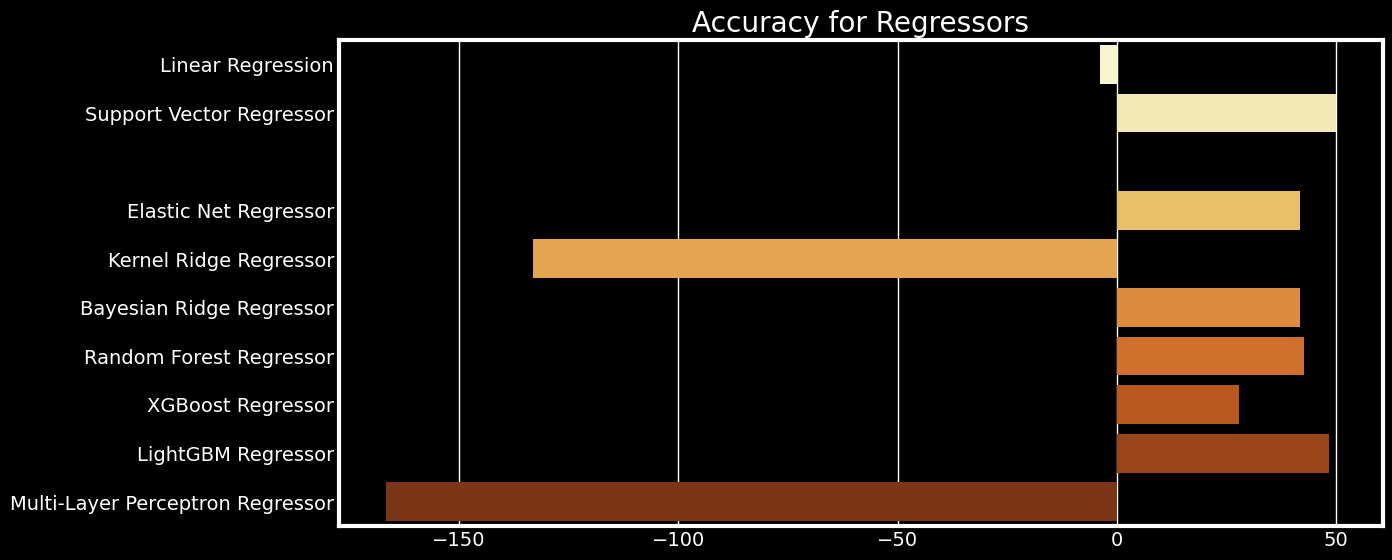

In [ ]:
plt.figure(figsize=(12,6))
model_accuracies = list(accuracy_scores.values())
model_names = list(accuracy_scores.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='YlOrBr')
plt.title('Accuracy for Regressors')

Text(0.5, 1.0, 'RMSE for Regressors')

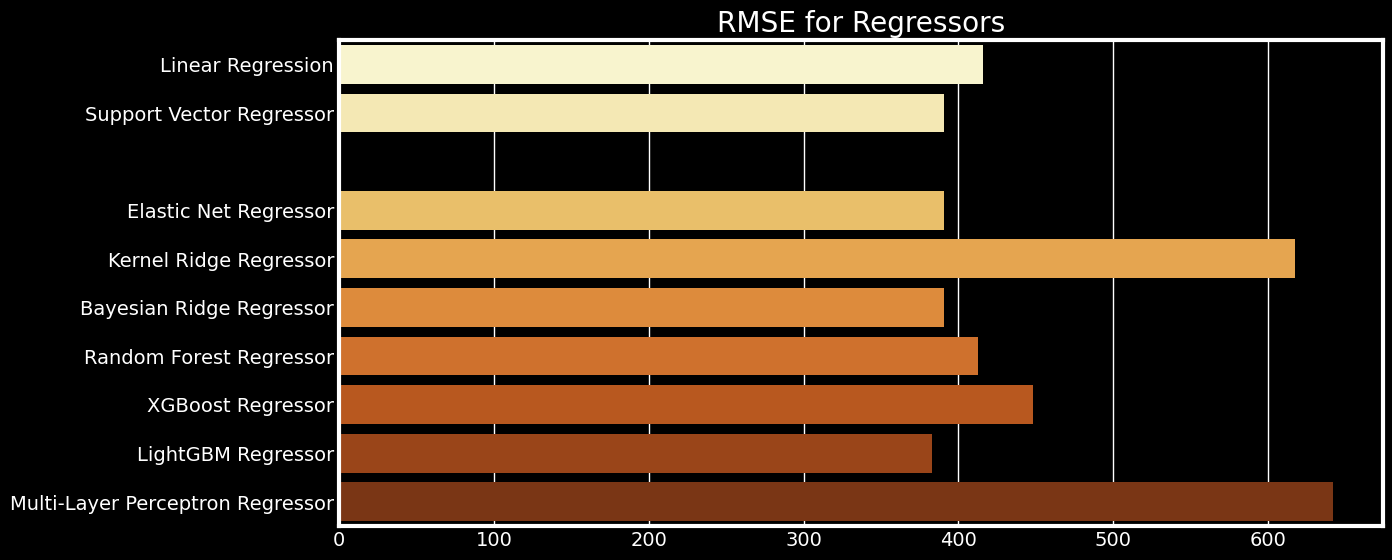

In [ ]:
plt.figure(figsize=(12,6))
model_rmse = list(RMSE.values())
model_names = list(RMSE.keys())
sns.barplot(x=model_rmse, y=model_names, palette='YlOrBr')
plt.title('RMSE for Regressors')

🎉And the Winners are🎉

Highest R2 Score - Support Vector Regressor

Lowest RMSE - K-Neighbors Regressor